Machine Learning Model used for predicting S&P500 index prices
that backtests against historical data for more accurate predicting

Uses Netflix as its example

In [1]:
# Imports

# RandomForestClasifier trains multiple trees with 
# randomised parameters then averages the results

# Precision Score for measuring how accurate our results are
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import precision_score

Query all data from Netflix data from when it was initially created

In [92]:
sp500 = yf.Ticker("NFLX")
sp500=sp500.history(period="max").copy()

In [93]:
#Remove unncecessary data 
del sp500["Dividends"]
del sp500["Stock Splits"]

In [94]:
#Show Data
sp500

,Open,High,Low,Close,Volume
Date,,,,,
2002-05-23 00:00:00-04:00,1.156429,1.242857,1.145714,1.196429,104790000
2002-05-24 00:00:00-04:00,1.214286,1.225000,1.197143,1.210000,11104800
2002-05-28 00:00:00-04:00,1.213571,1.232143,1.157143,1.157143,6609400
2002-05-29 00:00:00-04:00,1.164286,1.164286,1.085714,1.103571,6757800
2002-05-30 00:00:00-04:00,1.107857,1.107857,1.071429,1.071429,10154200
...,...,...,...,...,...
2022-10-14 00:00:00-04:00,237.800003,238.800003,229.509995,230.000000,15275700
2022-10-17 00:00:00-04:00,234.410004,249.919998,234.399994,245.100006,21057800
2022-10-18 00:00:00-04:00,249.800003,250.369995,237.729996,240.860001,25776700


In [95]:
# Check Index
sp500.index

DatetimeIndex(['2002-05-23 00:00:00-04:00', '2002-05-24 00:00:00-04:00',
               '2002-05-28 00:00:00-04:00', '2002-05-29 00:00:00-04:00',
               '2002-05-30 00:00:00-04:00', '2002-05-31 00:00:00-04:00',
               '2002-06-03 00:00:00-04:00', '2002-06-04 00:00:00-04:00',
               '2002-06-05 00:00:00-04:00', '2002-06-06 00:00:00-04:00',
               ...
               '2022-10-07 00:00:00-04:00', '2022-10-10 00:00:00-04:00',
               '2022-10-11 00:00:00-04:00', '2022-10-12 00:00:00-04:00',
               '2022-10-13 00:00:00-04:00', '2022-10-14 00:00:00-04:00',
               '2022-10-17 00:00:00-04:00', '2022-10-18 00:00:00-04:00',
               '2022-10-19 00:00:00-04:00', '2022-10-20 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=5140, freq=None)

Cleaning/presenting the data then setting up the target to predict whether the price will rise or fall the next day

<AxesSubplot:xlabel='Date'>

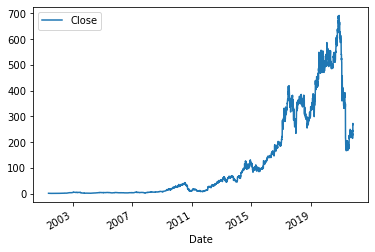

In [96]:
# Plot closing price agaisnt the training dates
sp500.plot.line(y="Close", use_index=True)

In [97]:
# New column that shows todays price as the prior days tomorrow price
sp500["Tomorrow"]=sp500["Close"].shift(-1)

In [98]:
# Check if tomorrows price is greater than the current price
sp500["Target"] = (sp500["Tomorrow"]>sp500["Close"]).astype(int)

In [99]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2002-05-23 00:00:00-04:00,1.156429,1.242857,1.145714,1.196429,104790000,1.210000,1
2002-05-24 00:00:00-04:00,1.214286,1.225000,1.197143,1.210000,11104800,1.157143,0
2002-05-28 00:00:00-04:00,1.213571,1.232143,1.157143,1.157143,6609400,1.103571,0
2002-05-29 00:00:00-04:00,1.164286,1.164286,1.085714,1.103571,6757800,1.071429,0
2002-05-30 00:00:00-04:00,1.107857,1.107857,1.071429,1.071429,10154200,1.076429,1
...,...,...,...,...,...,...,...
2022-10-14 00:00:00-04:00,237.800003,238.800003,229.509995,230.000000,15275700,245.100006,1
2022-10-17 00:00:00-04:00,234.410004,249.919998,234.399994,245.100006,21057800,240.860001,0
2022-10-18 00:00:00-04:00,249.800003,250.369995,237.729996,240.860001,25776700,272.380005,1


In [100]:
# Only take rows from the last 20 years
# This is for a more accurate training set for the current SP500 price
sp500 = sp500.loc["2002-01-01":].copy()

In [101]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2002-05-23 00:00:00-04:00,1.156429,1.242857,1.145714,1.196429,104790000,1.210000,1
2002-05-24 00:00:00-04:00,1.214286,1.225000,1.197143,1.210000,11104800,1.157143,0
2002-05-28 00:00:00-04:00,1.213571,1.232143,1.157143,1.157143,6609400,1.103571,0
2002-05-29 00:00:00-04:00,1.164286,1.164286,1.085714,1.103571,6757800,1.071429,0
2002-05-30 00:00:00-04:00,1.107857,1.107857,1.071429,1.071429,10154200,1.076429,1
...,...,...,...,...,...,...,...
2022-10-14 00:00:00-04:00,237.800003,238.800003,229.509995,230.000000,15275700,245.100006,1
2022-10-17 00:00:00-04:00,234.410004,249.919998,234.399994,245.100006,21057800,240.860001,0
2022-10-18 00:00:00-04:00,249.800003,250.369995,237.729996,240.860001,25776700,272.380005,1


### Training the model

Estimators are the number of decision trees

Min Sample Split protects against overfitting but can cause less accuracy as the value increases

A Random State value allows results to always be the same 


In [102]:
model = rfc(n_estimators=100,min_samples_split=100,random_state=1)
# Put all but last 100 rows into training set
# Put the remaining rows into the test set
train=sp500.iloc[:-100]
test=sp500.iloc[-100:]

# Train using the following columns and predict Target
predictors=["Close","Volume","Open","High","Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [103]:
# Geneate predictions using the prediction test set then 
# convert this numpy array to a pandas series
preds = model.predict(test[predictors])
preds = pd.Series(preds,index=test.index)

In [104]:
preds

Date
2022-05-31 00:00:00-04:00    1
2022-06-01 00:00:00-04:00    1
2022-06-02 00:00:00-04:00    1
2022-06-03 00:00:00-04:00    1
2022-06-06 00:00:00-04:00    1
                            ..
2022-10-14 00:00:00-04:00    1
2022-10-17 00:00:00-04:00    1
2022-10-18 00:00:00-04:00    1
2022-10-19 00:00:00-04:00    0
2022-10-20 00:00:00-04:00    1
Length: 100, dtype: int32

In [105]:
# Calculate precision using the target and predicted target
precision_score(test["Target"],preds)

0.4725274725274725

Combine test and predicted values and plot to see how they line up

<AxesSubplot:xlabel='Date'>

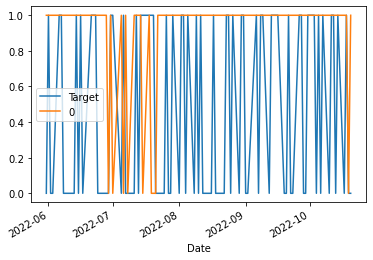

In [106]:
combined = pd.concat([test["Target"],preds],axis=1)
combined.plot()

Create a Predict function and a Backtest function 

The purpose of this is to allow us to backtest over multiple years of data to gain a more accurate prediction 

We wrap all of our code above into a singular prediction function so it can be called when backtesting

In [107]:
def predict(train,test,predictors,model):
    model.fit(train[predictors], train["Target"])
    preds=model.predict(test[predictors])
    preds=pd.Series(preds,index=test.index,name="Predictions")
    combined=pd.concat([test["Target"],preds],axis=1)
    return combined

In [108]:
# With every year having ~250 days of trading
# We use start of 2500 to go through 10 years of data
# Looping through 10 years of data we can predict the 11th year
# Looping through the 11 years we can then predict the 12th year
# We repeat this so we can predict various years for more
# accuracy and confidence in our model
# We then combine all of these predictions 
def backtest(data,model,predictors,start=2500,step=250):
    all_predictions=[]
    
    for i in range(start,data.shape[0],step):
        train=data.iloc[0:i].copy()
        test=data.iloc[i:(i+step)]
        predictions=predict(train,test,predictors,model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [109]:
predictions=backtest(sp500,model,predictors)

Count our predictions

0 being days that the market goes down

1 being days that the market goes up

We then get the percentage of days our algorithm was accurate and compare it to the actual data

In [110]:
predictions["Predictions"].value_counts()

0    1802
1     838
Name: Predictions, dtype: int64

In [111]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5346062052505967

In [112]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.507576
0    0.492424
Name: Target, dtype: float64

Now we can add more predictors to our model to improve accuracy

We get the mean closing price of each horizon(each being a set amount of trading days) and getting the ratio of the closing price of those time periods vs todays closing price

Then we give this to the algorithm so it can make better predictions

In [113]:
horizons = [2,5,60,250,1000]
new_predictors = []

# Loop through each horizon 
# Get the ratio of the closing price and the mean closing price 
# of each horizon
for horizon in horizons:
    rolling_average=sp500.rolling(horizon).mean()
    
    ratio_column=f"Close_Ratio_{horizon}"
    sp500[ratio_column]=sp500["Close"]/rolling_average["Close"]
    
    trend_column=f"Trend_{horizon}"
    sp500[trend_column]=sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+=[ratio_column,trend_column]

In [114]:
# Drop data that wasnt calculated due to missing data required
# for each horizon
sp500=sp500.dropna()

In [115]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2006-05-12 00:00:00-04:00,4.250000,4.250000,4.145714,4.227143,6456100,4.064286,0,0.997136,0.0,0.979931,2.0,1.051678,36.0,1.225372,134.0,1.674830,496.0
2006-05-15 00:00:00-04:00,4.192857,4.238571,4.004286,4.064286,7114800,4.094286,1,0.980358,0.0,0.951951,2.0,1.009187,35.0,1.175443,134.0,1.608486,495.0
2006-05-16 00:00:00-04:00,4.071429,4.194286,4.058571,4.094286,6390300,4.012857,0,1.003677,1.0,0.972382,2.0,1.014430,36.0,1.181550,134.0,1.618477,496.0
2006-05-17 00:00:00-04:00,4.101429,4.115714,4.008571,4.012857,6195700,3.958571,0,0.989956,1.0,0.971636,1.0,0.992878,35.0,1.155771,133.0,1.584466,496.0
2006-05-18 00:00:00-04:00,4.005714,4.101429,3.955714,3.958571,4592700,3.981429,1,0.993190,0.0,0.972281,1.0,0.978673,34.0,1.137930,133.0,1.561251,496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-13 00:00:00-04:00,212.690002,234.470001,211.729996,232.509995,17505000,230.000000,0,1.025674,2.0,1.035772,3.0,1.006004,30.0,0.646979,113.0,0.573573,507.0
2022-10-14 00:00:00-04:00,237.800003,238.800003,229.509995,230.000000,15275700,245.100006,1,0.994573,1.0,1.019820,3.0,0.994705,29.0,0.642915,112.0,0.567482,507.0
2022-10-17 00:00:00-04:00,234.410004,249.919998,234.399994,245.100006,21057800,240.860001,0,1.031783,1.0,1.072394,3.0,1.058129,30.0,0.688154,112.0,0.604839,507.0


Changing model parameters can help improve accuracy

This changes based on each model

Changing the predict function to make it more confident

If the probability of the stock price going up is 55% or higher then indicate the price goes up on that day



In [148]:
model=rfc(n_estimators=200,min_samples_split=100,random_state=1)

In [149]:
def predict(train,test,predictors,model):
    model.fit(train[predictors], train["Target"])
    preds=model.predict_proba(test[predictors])[:,1]
    preds[preds>=.55]=1
    preds[preds<.55]=0
    preds=model.predict(test[predictors])
    preds=pd.Series(preds,index=test.index,name="Predictions")
    combined=pd.concat([test["Target"],preds],axis=1)
    return combined

After altering the model we can see whether the improved model is more accurate 

In [150]:
predictions=backtest(sp500,model,new_predictors)

In [151]:
predictions["Predictions"].value_counts()

1    1017
0     622
Name: Predictions, dtype: int64

In [147]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5209205020920502